<a href="https://colab.research.google.com/github/freakezoide/codigos-de-coolab/blob/main/prueba_final_vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('winequality-red.csv', sep=';')
df = pd.read_csv('winequality-white.csv', sep=';')
# Mostrar información básica
print("Información del dataset:")
print(df.info())

# Mostrar primeras filas
print("\nPrimeras filas del dataset:")
print(df.head())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None

Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  ch

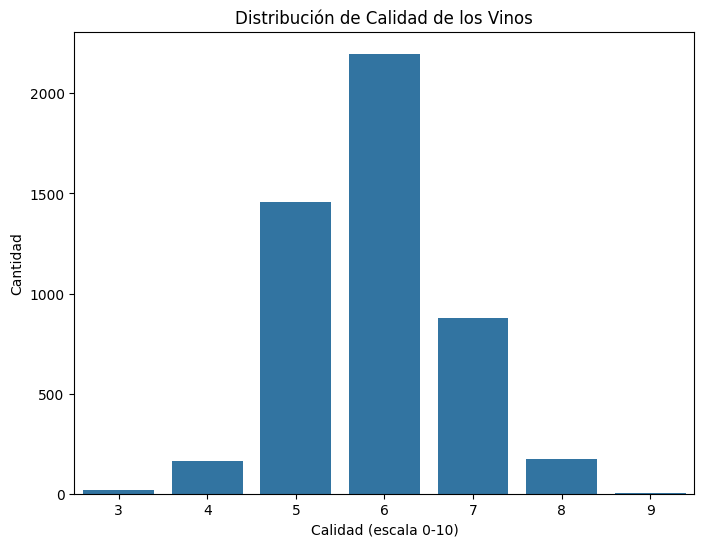

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribución de Calidad de los Vinos')
plt.xlabel('Calidad (escala 0-10)')
plt.ylabel('Cantidad')
plt.show()


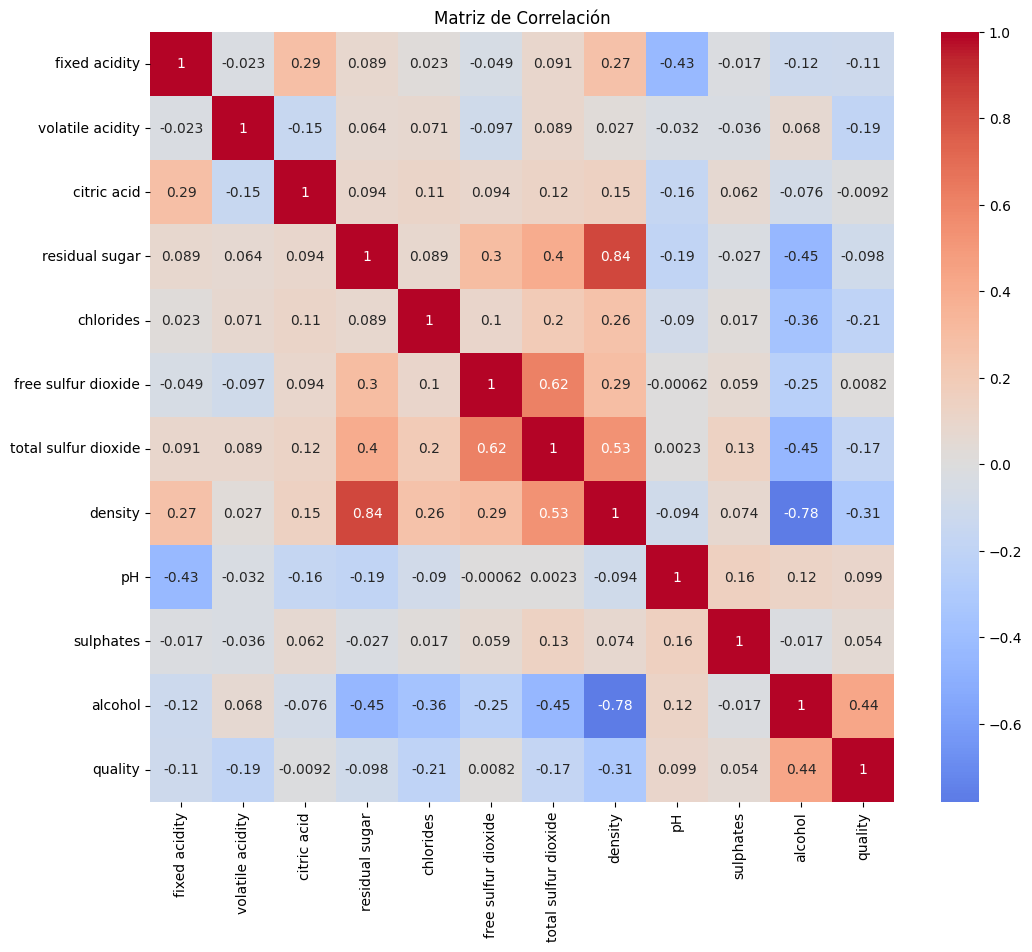

In [55]:
plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

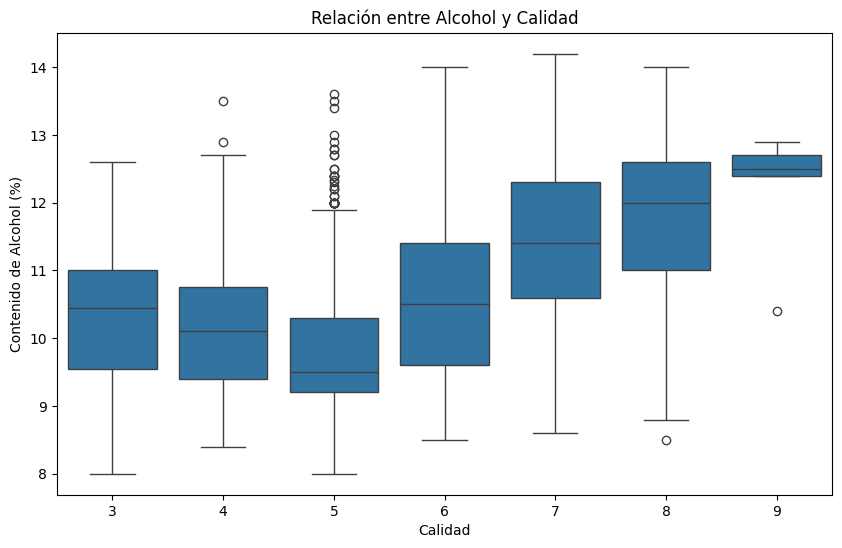

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Relación entre Alcohol y Calidad')
plt.xlabel('Calidad')
plt.ylabel('Contenido de Alcohol (%)')
plt.show()

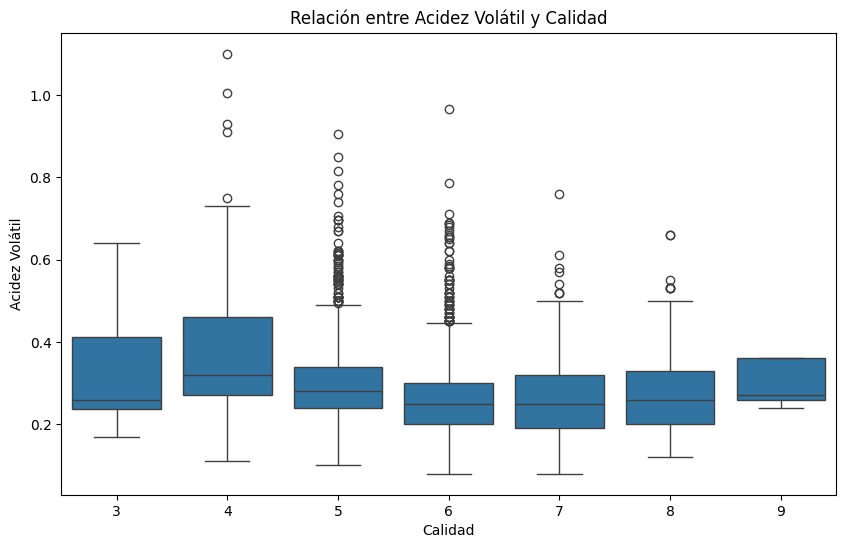

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Relación entre Acidez Volátil y Calidad')
plt.xlabel('Calidad')
plt.ylabel('Acidez Volátil')
plt.show()

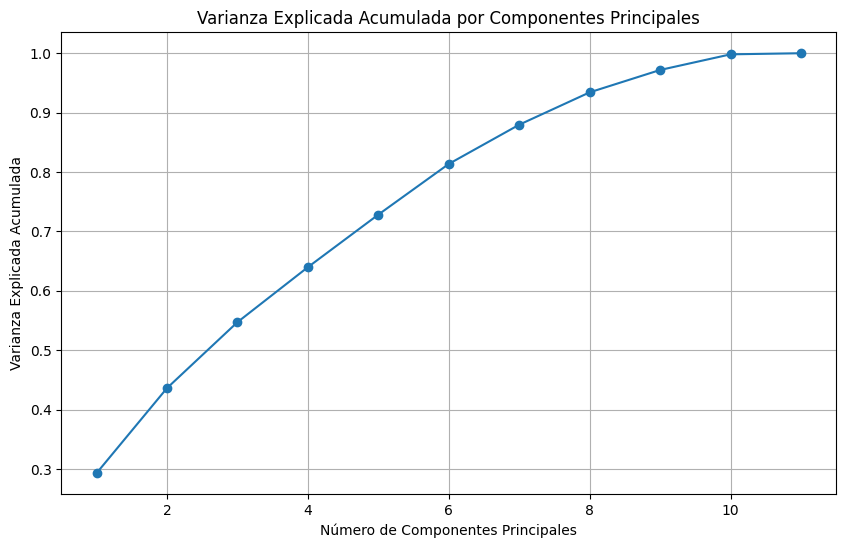

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
features = df.drop('quality', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_features)

# Visualizar varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid()
plt.show()